In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls -lrth


total 8.0K
drwxr-xr-x 1 root root 4.0K Jul 13 13:33 sample_data/
drwx------ 5 root root 4.0K Jul 17 10:29 drive/


In [3]:
cd drive

/content/drive


In [4]:
ls -lrth


total 4.0K
drwx------ 7 root root 4.0K Jul 17 10:29 MyDrive/


In [5]:
cd MyDrive

/content/drive/MyDrive


In [6]:
ls -lrth

total 427M
-rw------- 1 root root 2.9M Aug 28  2014 'How to get started with Drive.pdf'
drwx------ 2 root root 4.0K Dec  4  2016 'Sai bodavula '/
-rw------- 1 root root 1.1M Jan 20  2018 'instagram effect'
-rw------- 1 root root  84K Feb 11  2018 'Photo from Lakshmi Narayana Bodavula'
-rw------- 1 root root  65M Mar 18  2018  VID_20180510_153714593.mp4
-rw------- 1 root root 1.9M Jun 16  2018  IMG_20180510_160530435.jpg
-rw------- 1 root root 1.6M Jun 16  2018  IMG_20180510_160305359.jpg
-rw------- 1 root root 2.0M Jun 16  2018  IMG_20180510_170618731.jpg
-rw------- 1 root root 2.0M Jun 16  2018  IMG_20180510_170735053.jpg
-rw------- 1 root root 2.0M Jun 16  2018  IMG_20180510_155204962.jpg
-rw------- 1 root root 2.2M Jun 16  2018  IMG_20180510_170731796.jpg
-rw------- 1 root root 1.6M Jun 16  2018  IMG_20180510_153636850.jpg
-rw------- 1 root root 1.5M Jun 16  2018  IMG_20180510_160240160.jpg
-rw------- 1 root root 2.2M Jun 16  2018  IMG_20180510_153707451.jpg
-rw------- 1 root root 1

In [7]:
cd data

/content/drive/MyDrive/data


In [10]:
import pandas as pd
import numpy as np
data=pd.read_csv("bank-full.csv",sep=';')

In [11]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [13]:
data.shape

(45211, 17)

In [14]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [15]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [17]:
data1=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome','month'])

In [18]:
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
data1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')

In [20]:
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
data1.shape

(45211, 49)

In [22]:
x=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)

In [23]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
y=data1.iloc[:,10]

In [25]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model=LogisticRegression()
model.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
model.coef_

array([[-1.74603100e-02, -2.05812233e-02,  2.05527450e-05,
        -7.51888116e-01, -2.16866037e-01, -1.18811014e-02,
         3.81079983e-03, -4.02712142e-01,  2.50904627e-03,
        -1.47187024e-01, -3.02669184e-02, -2.84686053e-01,
        -3.03496121e-02, -9.84584838e-03,  7.14407918e-03,
         1.86629348e-01, -1.80446851e-02, -9.98344951e-02,
         3.39756557e-02, -7.84352112e-02,  3.26577624e-03,
         2.76594370e-03,  1.80799823e-02, -1.95029484e-01,
        -1.40732519e-01, -7.84951589e-02, -3.05797287e-01,
         5.13218063e-02,  1.52886189e-02,  1.02920215e-01,
         5.70646302e-02, -4.77666866e-01, -1.52454836e-01,
        -3.61802982e-02,  3.50172088e-01, -4.79218973e-01,
         4.60862242e-02,  2.71604136e-02,  3.23611646e-02,
        -1.61403989e-02, -1.54247023e-02, -9.22767988e-02,
        -6.12640443e-02,  9.76490927e-02, -4.66106421e-01,
        -6.46815081e-02,  1.11028525e-01,  8.39264324e-02]])

In [29]:
model.intercept_

array([-0.31771199])

In [31]:
pred=model.predict(x)
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y,pred)

array([[39157,   765],
       [ 4132,  1157]])

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [35]:
pred_proba=model.predict_proba(x)[:,1]

In [36]:
pred_proba

array([0.04445445, 0.02473691, 0.0181318 , ..., 0.67175941, 0.07936405,
       0.09877948])

In [41]:
fpr, tpr, thresholds = roc_curve(y,pred_proba)


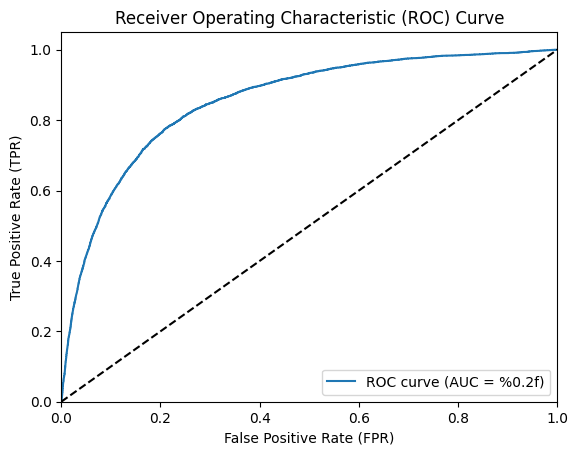

In [48]:
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()